# Tarea 10 - SimPy: Contagios post COVID-19

> Asignatura: Simulación<br/>
> Estudiante: Eduardo Zhizhpon

Realizar la planificación y modelado de una simulacion basado en eventos discretos para identificar los contagios dentro de un establecimiento de estudiantes post COVID-19 para el reingreso de clases. Los pasos para el regreso progresivo a clases se describe a continuación:

- Calcular e Identificar el aforo máximo permitido en la institución educativa.
- Identificar el número de estudiantes y el porcentaje de contagio dentro del contexto poblacional el mismo que se aplicara dentro de la simulación por el contagio.
- Generar la simulación desde la puerta de ingreso y la salida del plantel por día.
- Los estudiantes hacen fila para ingresar al establecimiento y no pueden superar el aforo permitido.
- Realizar con un tiempo de un 1 mes.
         
Generar graficas que indiquen los estudiantes que presentaron complicaciones y el total de estudiantes por establecimiento en cada día o semana.

**Nota:** No tomar datos de transporte, numero de aulas, personal docente, etc. Solo se el ingreso, salida y el contagio dentro del establecimiento.


In [91]:
import random
import simpy

from scipy import stats

class Student():
    def __init__(self, env, name, min_study, max_study, capacity):
        self.env = env
        self.name = name
        self.min_study = min_study
        self.max_study = max_study
        self.capacity = capacity
        
        self.is_infected = False
    
    def get_studying_time(self):
        # return abs(random.normalvariate(self.max_study, 2))
        return random.randint(self.min_study, self.max_study)
    
    def infect_time(self):
        return random.expovariate(INFECT_PROBABILITY)
    
    def studying(self):
        studying_time = self.get_studying_time()
        yield self.env.timeout(studying_time)
        self.infect_a_student(studying_time)
        # print(f'Estudiante [{self.name}] sale de la Universidad', self.env.now)
    
    def infect_a_student(self, studying_time):
        global infected_num
        infect = stats.bernoulli.rvs(INFECT_PROBABILITY, size=1)
        if infect == 1 and not self.is_infected:
            # print(f'Estudiante [{self.name}] INFECTADO')
            self.is_infected = True
            infected_num += 1
    
    def enter_university(self):
        global studens_inside_num
        yield self.env.timeout(random.randint(MIN_WAIT, MAX_WAIT))
        with self.capacity.request() as current_capacity:
            yield current_capacity
            # print(f'Estudiante [{self.name}] entra a la Universidad', self.env.now)
            studens_inside_num += 1
            yield self.env.process(self.studying())
        
class Institution():
    
    def __init__(self, max_students, max_capacity, infection_percentage):
        self.max_students = max_students
        self.infection_percentage = infection_percentage
        self.max_capacity = max_capacity
    
        self.env = simpy.Environment()
        self.capacity = simpy.Resource(self.env, self.max_capacity)
        self.students = []
        
    def run_simulation(self):
        global infected_total_num, infected_num, \
            infected_total_by_day, studens_inside_num, \
            studdents_num_by_day
        current_time = 0
        for i in range(SIM_DAYS):
            infected_num = 0
            studens_inside_num = 0
            
            print(f'Comienzo del día {i}')
            for student in self.students:
                self.env.process(student.enter_university())
            current_time += SIM_TIME_EACH_DAY
            self.env.run(until = current_time)
            print(f'Fin del día {i} con {infected_num} infectados')
            
            infected_num_by_day[i] = infected_num
            infected_total_by_day[i] = len(self.get_infected_students())
            students_num_by_day[i] = studens_inside_num
            
            infected_total_num += infected_num
    
    def gen_students(self):
        self.students = [Student(
            self.env, str(i), MIN_STUDYING, MAX_STUDYING, self.capacity) 
                         for i in range(self.max_students)]
        
    def get_infected_students(self, filer_by_not_infected=False):
        filtered_students = []
        if self.students == None:
            return filtered_students
        
        for student in self.students:
            if student.is_infected and not filer_by_not_infected:
                filtered_students.append(student)
            elif filer_by_not_infected and not student.is_infected:
                filtered_students.append(student)
        return filtered_students
            

In [92]:
REST_TIME = 14 * 24

INFECT_PROBABILITY = 0.067

MIN_STUDYING = 2 * 60 * 60
MAX_STUDYING = 6 * 60 * 60

MIN_WAIT = 2 * 60 * 60
MAX_WAIT = 10 * 60 * 60

MAX_STUDENTS = 5000

MAX_CAPACITY = 1000

SIM_DAYS = 30

# 60 segundos * 60 minutos * 15 horas 
# que pasa abierta la universidad
SIM_TIME_EACH_DAY = 60 * 60 * 15

studens_inside_num = 0
infected_num = 0
infected_total_num = 0

infected_num_by_day = {}
infected_total_by_day = {}
not_infected_total_by_day = {}
students_num_by_day = {}

random.seed(77)

institution = Institution(MAX_STUDENTS, MAX_CAPACITY, INFECT_PROBABILITY)
institution.gen_students()
institution.run_simulation()

Comienzo del día 0
Fin del día 0 con 174 infectados
Comienzo del día 1
Fin del día 1 con 271 infectados
Comienzo del día 2
Fin del día 2 con 244 infectados
Comienzo del día 3
Fin del día 3 con 192 infectados
Comienzo del día 4
Fin del día 4 con 225 infectados
Comienzo del día 5
Fin del día 5 con 227 infectados
Comienzo del día 6
Fin del día 6 con 185 infectados
Comienzo del día 7
Fin del día 7 con 177 infectados
Comienzo del día 8
Fin del día 8 con 183 infectados
Comienzo del día 9
Fin del día 9 con 141 infectados
Comienzo del día 10
Fin del día 10 con 164 infectados
Comienzo del día 11
Fin del día 11 con 151 infectados
Comienzo del día 12
Fin del día 12 con 123 infectados
Comienzo del día 13
Fin del día 13 con 109 infectados
Comienzo del día 14
Fin del día 14 con 123 infectados
Comienzo del día 15
Fin del día 15 con 111 infectados
Comienzo del día 16
Fin del día 16 con 118 infectados
Comienzo del día 17
Fin del día 17 con 114 infectados
Comienzo del día 18
Fin del día 18 con 116 infec

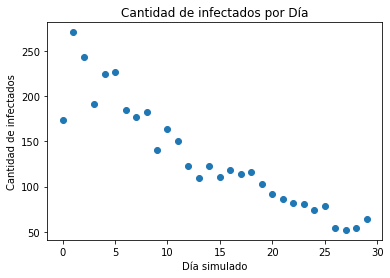

In [93]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(infected_num_by_day.keys(), infected_num_by_day.values())
ax.set_xlabel('Día simulado')
ax.set_ylabel('Cantidad de infectados')
ax.set_title('Cantidad de infectados por Día')
plt.show()

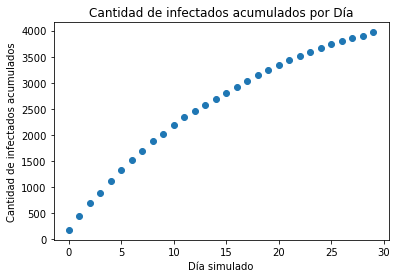

In [94]:
fig, ax = plt.subplots()
ax.scatter(infected_total_by_day.keys(), infected_total_by_day.values())
ax.set_xlabel('Día simulado')
ax.set_ylabel('Cantidad de infectados acumulados')
ax.set_title('Cantidad de infectados acumulados por Día')
plt.show()

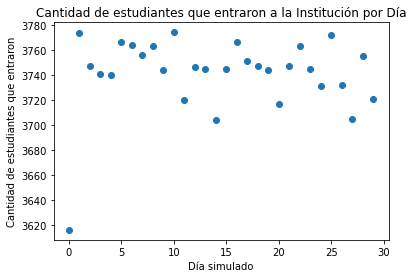

In [95]:
fig, ax = plt.subplots()
ax.scatter(students_num_by_day.keys(), students_num_by_day.values())
ax.set_xlabel('Día simulado')
ax.set_ylabel('Cantidad de estudiantes que entraron')
ax.set_title('Cantidad de estudiantes que entraron a la Institución por Día')
plt.show()